## Import llibraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [7]:
data = pd.read_csv('CSE_student_performances.csv')

In [8]:
data.head()

,Age,Gender,AcademicPerformance,TakingNoteInClass,DepressionStatus,FaceChallangesToCompleteAcademicTask,LikePresentation,SleepPerDayHours,NumberOfFriend,LikeNewThings
0,23,Male,Average,No,Sometimes,Yes,Yes,12,NaN,Yes
1,23,Male,Excellent,Sometimes,Yes,No,Yes,8,80.0,Yes
2,24,Male,Average,No,Sometimes,Sometimes,No,8,10.0,Yes
3,20,Female,Good,Yes,Sometimes,Yes,No,5,15.0,Yes
4,24,Female,Average,Yes,Yes,Yes,Yes,5,2.0,Yes


## Preprocessing 

In [11]:
data.shape

(99, 10)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   99 non-null     int64  
 1   Gender                                99 non-null     object 
 2   AcademicPerformance                   99 non-null     object 
 3   TakingNoteInClass                     99 non-null     object 
 4   DepressionStatus                      99 non-null     object 
 5   FaceChallangesToCompleteAcademicTask  99 non-null     object 
 6   LikePresentation                      99 non-null     object 
 7   SleepPerDayHours                      99 non-null     int64  
 8   NumberOfFriend                        95 non-null     float64
 9   LikeNewThings                         99 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.9+ KB


In [13]:
data.isna().sum()

Age                                     0
Gender                                  0
AcademicPerformance                     0
TakingNoteInClass                       0
DepressionStatus                        0
FaceChallangesToCompleteAcademicTask    0
LikePresentation                        0
SleepPerDayHours                        0
NumberOfFriend                          4
LikeNewThings                           0
dtype: int64

In [14]:
data = data.fillna(0)

In [18]:
data.sample(8)

,Age,Gender,AcademicPerformance,TakingNoteInClass,DepressionStatus,FaceChallangesToCompleteAcademicTask,LikePresentation,SleepPerDayHours,NumberOfFriend,LikeNewThings
63,23,Female,Average,Sometimes,Yes,Sometimes,No,8,2.0,No
65,24,Male,Average,No,Sometimes,Sometimes,No,8,10.0,Yes
79,24,Male,Average,Sometimes,No,Yes,Yes,7,100.0,Yes
51,21,Female,Good,Yes,Yes,Sometimes,Yes,4,2.0,Yes
0,23,Male,Average,No,Sometimes,Yes,Yes,12,0.0,Yes
50,22,Female,Average,Yes,No,No,Yes,7,3.0,Yes
92,22,Female,Average,Yes,No,No,Yes,7,3.0,Yes
80,20,Male,Good,No,Sometimes,No,Yes,7,7.0,Yes


In [15]:
data.isna().sum()

Age                                     0
Gender                                  0
AcademicPerformance                     0
TakingNoteInClass                       0
DepressionStatus                        0
FaceChallangesToCompleteAcademicTask    0
LikePresentation                        0
SleepPerDayHours                        0
NumberOfFriend                          0
LikeNewThings                           0
dtype: int64

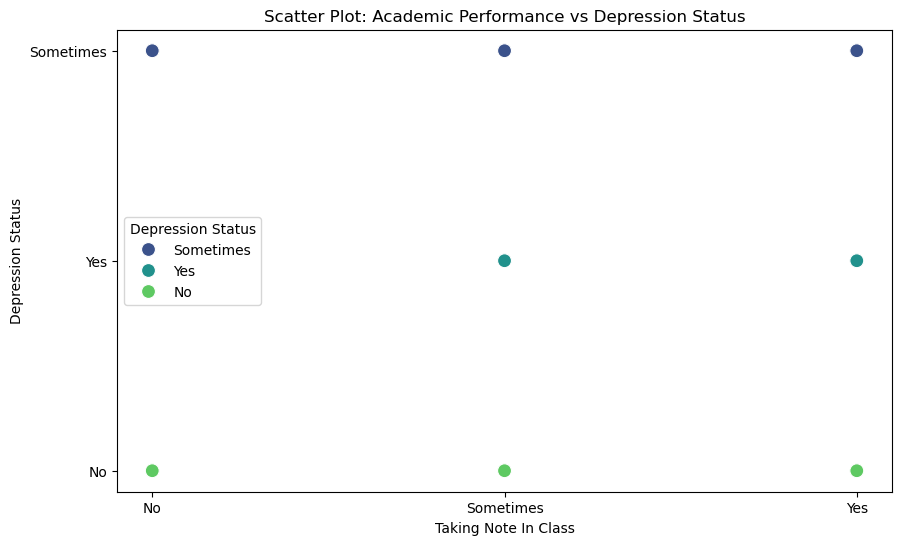

In [29]:


plt.figure(figsize=(10, 6))

sns.scatterplot(x='TakingNoteInClass', y='DepressionStatus', data=data, hue='DepressionStatus', palette='viridis', s=100)

plt.title('Scatter Plot: Academic Performance vs Depression Status')
plt.xlabel('Taking Note In Class')
plt.ylabel('Depression Status')
plt.legend(title='Depression Status')


In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode = ['Gender', 'AcademicPerformance', 'TakingNoteInClass', 'DepressionStatus', 'FaceChallangesToCompleteAcademicTask', 'LikePresentation', 'SleepPerDayHours', 'NumberOfFriend', 'LikeNewThings']

data[columns_to_encode] = data[columns_to_encode].apply(lambda col: label_encoder.fit_transform(col))

In [31]:
X = data.drop(['DepressionStatus'], axis=1)
y = data['DepressionStatus']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

scale.fit(X_train)

X_train_transform = scale.transform(X_train)
X_test_transform = scale.transform(X_test)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()

model.fit(X_train_transform, y_train)

y_pred = model.predict(X_test_transform)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.55

Confusion Matrix:
[[2 1 0]
 [2 3 1]
 [1 4 6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.38      0.50      0.43         6
           2       0.86      0.55      0.67        11

    accuracy                           0.55        20
   macro avg       0.54      0.57      0.53        20
weighted avg       0.64      0.55      0.57        20



In [37]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train_transform, y_train)

y_pred = rf_classifier.predict(X_test_transform)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.85

Confusion Matrix:
[[3 0 0]
 [0 6 0]
 [0 3 8]]


In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train_transform, y_train)

y_pred = knn_classifier.predict(X_test_transform)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("K-Nearest Neighbors:")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

K-Nearest Neighbors:
Accuracy: 0.65

Confusion Matrix:
[[3 0 0]
 [2 3 1]
 [3 1 7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.38      1.00      0.55         3
           1       0.75      0.50      0.60         6
           2       0.88      0.64      0.74        11

    accuracy                           0.65        20
   macro avg       0.67      0.71      0.63        20
weighted avg       0.76      0.65      0.67        20

